# Credit Card Fraud Detection #

### Objetivo ###

Criar um modelo de classificacao que consiga identificar fraudes de cartoes de creditos.

### Compreensao dos dados ###

Este dataset contem transacoes historicas de cartoes de creditos. Contendo 284.807 transacoes e 492 fraudes detectadas.

O dataset possui apenas atributos numericos que por confidencialidade possuem nomes de V1, V2.. a V28, alem da variavel time e Amount.

O atriuto a ser previsto (Class) possui valores 0 e 1, sendo 0 para nao fraude e 1 para fraude.

**fonte dos dados: https://www.kaggle.com/mlg-ulb/creditcardfraud**

## Carregando os Modulos e Lendo os dados ## 

In [ ]:
# Importando os modulos
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

## Analise Exploratoria ## 

Visualização parcial do dataset

In [3]:
# Lendo o conjunto de dados
df = pd.read_csv("creditcard.csv")

In [9]:
# Dimensao dos dados
df.shape

(284807, 31)

In [4]:
# Visualizando as primeiras linhas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Visualizando as ultimas linhas
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
# Tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

Estatistica descritiva dos dados

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


Grande parte do atributo class possuem apenas o valor zero.

Sera necessario balancear os dados para que o modelo consiga aprender o que seria fraude (1).

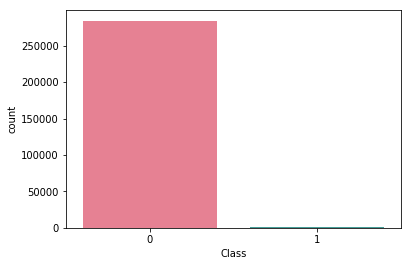

In [8]:
# Distribuição dos dados de acordo com o TARGET
sns.countplot(x='Class',data = df, palette="husl", order = range(2))

A Funcao SMOTE ira gerar novos valores com base no atributo Class = 1, desta forma a base de dados passa de 28 mil linhas para 39 mil.

Conforme o novo grafico, os atributos estao bem mais equilibrados.

In [12]:
# Função para balancear os dados
def balancear(dados):
    from imblearn.over_sampling import SMOTE

    # dividindo os dados em atributos e variavel alvo
    x = dados.drop("Class", axis = 1).values
    y = dados.Class.values

    # criando uma lista com os nomes dos atributos
    atributos = dados.columns.drop("Class")

    # Balanceando os dados
    sm = SMOTE(random_state = 37)
    x_res, y_res = sm.fit_resample(x, y)

    # criando novo dataset com os dados balanceados
    df_smote = pd.DataFrame(x_res, columns = atributos)
    df_smote['Class'] = y_res
    
    return df_smote

# Chamando a função para balancear os dados
df_smote = balancear(df)

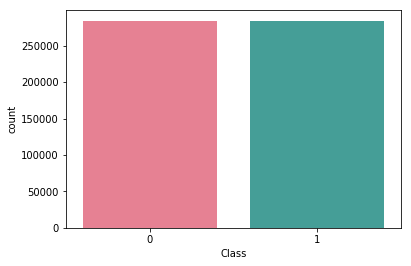

In [13]:
# Distribuição dos dados de acordo com o TARGET
sns.countplot(x='Class',data = df_smote, palette="husl", order = range(2))

## Criando o modelo ## 

Criando dois datasets, um com 70% dos dados para criar o modelo e o outro com 30% dos dados para usar como teste.

In [40]:
# Definindo valores de x e y
X = df_smote.drop(["Time", "Class"], axis = 1)
y = df_smote.Class

# Dividindo os dados em treino e teste
x_treino, x_teste, y_treino, y_teste = model_selection.train_test_split(X, y, test_size = 0.30, random_state = 8)

In [41]:
# Criando um modelo com random forest
modelo = RandomForestClassifier(n_estimators  = 50)

# treinando o modelo
modelo.fit(x_treino, y_treino)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

O modelo Random Forest foi criado utilizando todos os atributos dos dados de treino e 50 arvores.

Aparentemente o modelo esta com overfitting, pois a taxa de erro esta proxima de 0% mediante aos dados de treino.

In [44]:
# Prevendo os dados de teste
pred = modelo.predict(x_teste)

# avaliando o modelo
accuracy_score(pred, y_teste)

0.9998944832316269

## Feature Selection ## 

Uma vantagem do random forest, seria a visualizacao das importancia dos atributos, permitindo que seja possivel selecionar os atributos que mais impactam no resutlado do modelo, sendo uma forma de reduzir o overfitting.

In [45]:
# feature selection
feat_imp = pd.DataFrame({'imp':modelo.feature_importances_, 'feat': x_treino.columns}).sort_values(by = 'imp', ascending=False)

# principais atributos
feat_imp.head(10)

,imp,feat
13,0.242135,V14
11,0.139588,V12
3,0.118939,V4
16,0.106080,V17
9,0.100616,V10
10,0.067045,V11
2,0.048477,V3
0,0.021677,V1
15,0.020958,V16
6,0.017191,V7


Criando um novo modelo de Random Forest com os atributos selecionados

In [48]:
# Definindo valores de x e y
X_feat = df_smote[["V14", "V12", "V4", "V17", "V10"]]
y_feat = df_smote.Class

# Dividindo os dados em treino e teste
x_treinof, x_testef, y_treinof, y_testef = model_selection.train_test_split(X_feat, y_feat, test_size = 0.30, random_state = 8)

## Avaliando o modelo ## 

Apos a criacao do novo modelo, ele sera testado com dados que nao participaram da criacao do modelo, de forma a validar sua capacidade de generalizacao.

A acuracia final foi de 99%.

In [49]:
# Criando o NOVO modelo com random forest
modelo_2 = RandomForestClassifier(n_estimators  = 50)

# treinando o modelo
modelo_2.fit(x_treinof, y_treinof)

# Prevendo os dados de teste
pred2 = modelo_2.predict(x_testef)

# avaliando o modelo
accuracy_score(pred2, y_testef)

0.9980596638704723

In [50]:
# confusion matrix
confusion_matrix(pred2, y_testef)

array([[85039,   144],
       [  187, 85219]], dtype=int64)